# Medical representative problem Machine Learning Kaggle project

# Ahmed Abelrahman
# January  ,2020
 ### [Linkedin](https://www.linkedin.com/in/ahmed-abdelrahman-27a582167/)
 
### [Github](https://github.com/Ahmed-Abdelrahman03)

----
## who's the  Medical representative, and what is he doing  ? 

the medical representative is a person hired by medical company. he is probably have a knowledge in biology and the chemical industry. His job is to promote the new drugs the company manufactured by knowing the dosages, side effects and contraindications.Then making a visit to the doctors who is working in specialties that in need for that drug to cure his patients and telling him the advantage of using that drug instead of the one of the rivals,also he may offer promotion for the doctor if he will describe the drug for his patients.After that they intelligence if the doctor had describe the drug or not.Also they keep all the record about the doctor's features like the if the doctors with high patient rate or not, what are the doctors specialties,examination price that the doctor takes from the patient and the doctor's class which is classified according to number of patients for every doctor and how much is the doctor's fame the other feature will be explained.

## what's the Medical representative problem?

the problem is even with highly skilled medical representative with good presentation skills there is a lot of features that will interference whether the doctors will describe the drug for his patient or not.

## Project Overview

In this project we will make an algorithm that predict whether the doctor will describe the company's drug for his patient or not by training the algorithm with the recorded data which explain the doctors feature and if is describing the drug or not.

----
## Exploring the Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore') 

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("medical.txt")


# Success - Display the first record
display(data.head(10))
data.shape[0]
data.columns[7]

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write
0,type1,area1,chest,45,a,200,clinic,1
1,type4,area2,im,36,b,100,clinic,1
2,type1,area8,chest,45,a,75,hospital,1
3,type1,area5,chest,45,a,30,hospital,1
4,type5,area6,uro,29,a,220,clinic,0
5,type5,area8,im,29,b,140,clinic,1
6,type6,area2,im,20,b,70,hospital,1
7,type4,area8,chest,36,a,75,hospital,0
8,type2,area3,cd,30,b,150,clinic,1
9,type2,area1,neuro,30,b,150,clinic,1


'write'

## Featureset Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a file
named medical attached with the project proposal.
Every sample consists of 7 features and 1 label(the output target).
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **area:** the goraphic destribution of the doctors.
* **Price:** price for every drug of these 6 drugs for patient.
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0)if not.

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many doctors describes the company's drug, and will tell us about the percentage of these doctors. In the code cell below, we will need to compute the following:
- The total number of doctors, `'n_doctors'`
- The number of doctors describes the company's drug, `'doctors_describes'`.
- The number of doctors not describes the company's drug, `'doctors_not_describes'`.
- The percentage of doctors describes the company's drug, `'doctors_describes_percent'`.


In [2]:
# Total number of doctors
n_doctors = data.shape[0]

# The number of doctors describes the company's drug
doctors_describes = data[data.write == 1].shape[0]

# The number of doctors not describes the company's drug
doctors_not_describes = data[data.write == 0].shape[0]

# Percentage of doctors describes the company's drug
doctors_describes_percent = (doctors_describes/n_doctors)*100

# Print the results

print("Total number of doctors: {}".format(n_doctors))
print("The number of doctors describes the company's drug: {}".format(doctors_describes))
print("Percentage of doctors describes the company's drug: {}%".format(doctors_describes_percent))

Total number of doctors: 390
The number of doctors describes the company's drug: 229
Percentage of doctors describes the company's drug: 58.71794871794872%


----
## Exploratory Visualization

## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Split the data into features and target label

In [3]:
# Split the data into features and target label
target = data['write']
features = data.drop('write', axis = 1)

In [4]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: ["dr_class == 'a'","clinic_hos == 'hospital'"]
    """

    field, op, value = condition.split(" ")
    
    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
    
    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

def write_stats(data, outcomes, key, filters = []):
    """
    Print out selected statistics regarding write, given a feature of
    interest and any number of filters (including no filters)
    """
    
    # Check that the key exists
    if key not in data.columns.values:
        print("'{}' is not a feature of the Medical representative data. Did you spell something wrong?".format(key))
        return False


    # Merge data and outcomes into single dataframe
    all_data = pd.concat([data, outcomes.to_frame()], axis = 1)
    
    # Apply filters to data
    for condition in filters:
        all_data = filter_data(all_data, condition)

    # Create outcomes DataFrame
    all_data = all_data[[key, 'write']]
    
    # Create plotting figure
    plt.figure(figsize=(8,6))

    # 'Numerical' features
    if(key == 'exam_price' or key == 'price'):
        
        # Remove NaN values from Age data
        all_data = all_data[~np.isnan(all_data[key])]
        
        # Divide the range of data into bins and count survival rates
        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        # 'Fares' has larger range of values than 'Age' so create more bins
        if(key == 'exam_price'):
            bins = np.arange(0, all_data['exam_price'].max() + 10, 10)
        if(key == 'price'):
            bins = np.arange(0, all_data['price'].max() + 10, 10)
        
        # Overlay each bin's survival rates
        nowrite_vals = all_data[all_data['write'] == 0][key].reset_index(drop = True)
        write_vals = all_data[all_data['write'] == 1][key].reset_index(drop = True)
        plt.hist(nowrite_vals, bins = bins, alpha = 0.6,
                 color = 'red', label = 'Did not write')
        plt.hist(write_vals, bins = bins, alpha = 0.6,
                 color = 'green', label = 'write')
    
        # Add legend to plot
        plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)
    
    # 'Categorical' features
    else:
       
        # Set the various categories
        
        if(key == 'medicine'):
            values = ['type1', 'type2', 'type3','type4','type5','type6']
        if(key == 'dr_class'):
            values = ['a', 'b']
        if(key == 'area'):
            values = ['area1', 'area2','area3','area4','area5','area6','area7','area8']
        if(key== 'speciality'):
            values=['chest','im','cd','neuro','git','ent','sur','uro','gp','or','vas']
        if(key== 'clinic_hos'):
            values=['clinic','hospital']
        if(key == 'price'):
            values = [45, 24,30,36,29,20]    
        # Create DataFrame containing categories and count of each
        frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'write','nwrite'))
        for i, value in enumerate(values):
            frame.loc[i] = [value, \
                   len(all_data[(all_data['write'] == 1) & (all_data[key] == value)]), \
                   len(all_data[(all_data['write'] == 0) & (all_data[key] == value)])]

        # Set the width of each bar
        bar_width = 0.4

        # Display each category's write rates
        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['nwrite'], width = bar_width, color = 'r')
            surv_bar = plt.bar(i, frame.loc[i]['write'], width = bar_width, color = 'g')

            plt.xticks(np.arange(len(frame)), values)
            plt.legend((nonsurv_bar[0], surv_bar[0]),('Did not write', 'write'), framealpha = 0.8)

    # Common attributes for plot formatting
    plt.xlabel(key)
    plt.ylabel('Number of doctors')
    plt.title('doctor writing Statistics With \'%s\' Feature'%(key))
    plt.show()



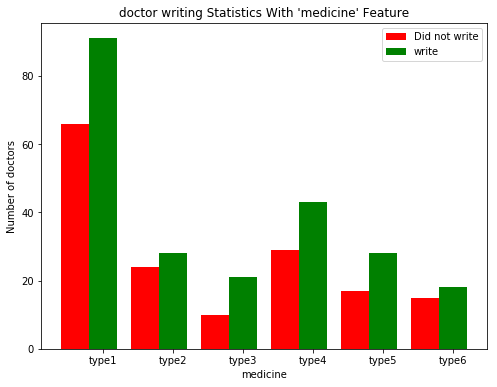

In [5]:
write_stats(features, target, 'medicine')

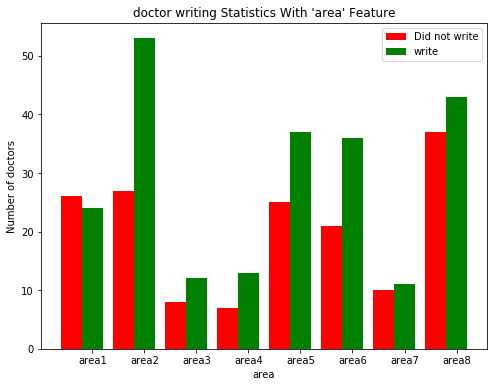

In [6]:
write_stats(features, target, 'area')

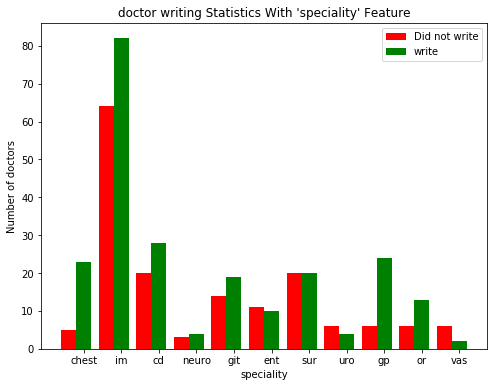

In [7]:
write_stats(features, target, 'speciality')

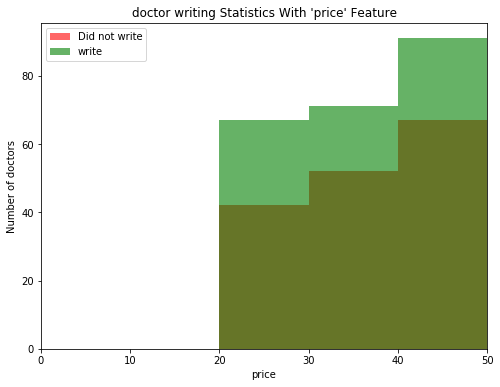

In [8]:
write_stats(features, target, 'price')

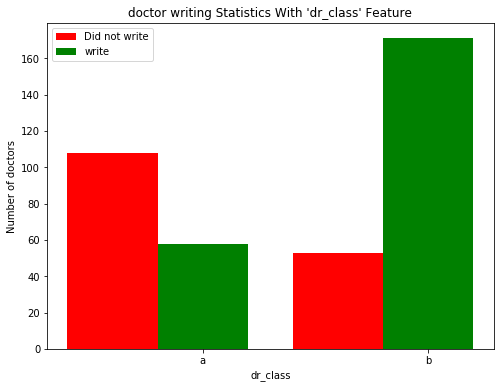

In [9]:
write_stats(features, target, 'dr_class')

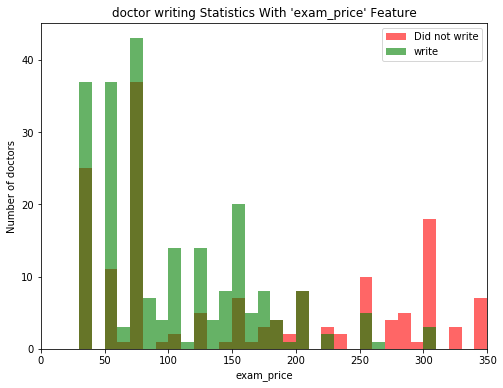

In [10]:
write_stats(features, target, 'exam_price')

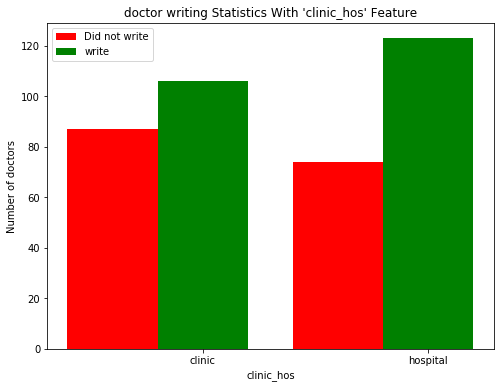

In [11]:
write_stats(features, target, 'clinic_hos')

----
fortunately the data we have doesn't have any outliers. Although there are wide variance in the "price examination" but it doesn't have values that could be describe  as outliers,So we will train our algorithm with this data.We don't have a testing data-set yet,So we will you cross validation to test our algorithm.

### Normalizing Numerical Features
It is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution, However, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [12]:

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['price', 'exam_price',]

features[numerical] = scaler.fit_transform(features[numerical])

# Show an example of a record with scaling applied
display(features.head(n = 7))


,medicine,area,speciality,price,dr_class,exam_price,clinic_hos
0,type1,area1,chest,1.00,a,0.531250,clinic
1,type4,area2,im,0.64,b,0.218750,clinic
2,type1,area8,chest,1.00,a,0.140625,hospital
3,type1,area5,chest,1.00,a,0.000000,hospital
4,type5,area6,uro,0.36,a,0.593750,clinic
5,type5,area8,im,0.36,b,0.343750,clinic
6,type6,area2,im,0.00,b,0.125000,hospital


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.

In [13]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features)



#print(income)
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
display(features_final[0:10])

31 total features after one-hot encoding.


,price,exam_price,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,area_area2,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.00,0.531250,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.64,0.218750,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,1.00,0.140625,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.00,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.36,0.593750,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5,0.36,0.343750,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
6,0.00,0.125000,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
7,0.64,0.140625,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,0.40,0.375000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0.40,0.375000,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 5)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 312 samples.
Testing set has 78 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor


 
*Medical representative ML*,  knows doctors describes are most likely to describes the company's medicine. Because of this, *Medical representative ML* is particularly interested in predicting the doctors who describes  the company's medicine accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performance would be appropriate. Additionally, identifying doctor that *does not* describes the company's medicine as someone who does would be detrimental to *Medical representative ML*, since they are looking to find doctors who will describe the company's medicine. Therefore, a model's ability to precisely predict those that doctors who will describe the company's medicine *more important* than the model's ability to **recall** those doctors. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatied), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

----
### Benchmark

### Naive Predictor Performace
* If we chose a model that always predicted the doctors who describes the company's medicine, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.



* When we have a model that always predicts '1' (i.e. the doctors who describes the company's medicine) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [15]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP=np.sum(target)
FP= n_doctors - TP
TN=0
FN=0
accuracy = TP/(TP+FP)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
 
# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore =(1+ beta**2)*(precision * recall)/((beta**2*precision)+recall) 


# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5872, F-score: 0.6400]


----
### Algorithms and Techniques

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Decision Trees
- Ensemble Methood
- K-Nearest Neighbors (KNeighbors)
- Support Vector Machines (SVM)
- Logistic Regression

### we will use these models for solving the problem
- 1-Decision Trees
- 2-Ensemble Methods using  AdaBoost method
- 3-Support Vector Machines 

then when we see a promising result from on of these model we will use the grid search techniques to enhance the result of that model and the ML algorithm as a whole.

----
# 1-Decision Trees:

 Strengths of Decision Trees:
------------------------------------------

- Decision trees implicitly perform variable screening or feature selection.
- Decision trees require relatively little effort from users for data preparation.
- Nonlinear relationships between parameters do not affect tree performance.
- The best feature of using trees for analytics - easy to interpret and explain to executives.
- Decision trees can handle both categorical and numerical variables at the same time as features. 

Weaknesses of Decision Trees :
----------------------------------------------

- They can be extremely sensitive to small perturbations in the data where a slight change can result in a drastically different tree. .
- They can easily overfit. This can be negated by validation methods and pruning, but this is a grey area..
- Need to discrete data for some particular construction algorithm .

What makes this model a good candidate for the problem ?
-------------------------------------------------------------------------------------
in my openion because of Decision trees can handle both categorical and numerical variables
Every split in a decision tree is based on a feature. If the feature is categorical, the split is done with the elements belonging to a particular class. If the feature is contiuous, the split is done with the elements higher than a threshold. At every split, the decision tree will take the best variable at that moment. This will be done according to an impurity measure with the splitted branches. And the fact that the variable used to do split is categorical or continuous is irrelevant (in fact, decision trees categorize contiuous variables by creating binary regions with the threshold).

so i will not need alot of data preparation before buildong my model



2- Support Vector Machine
--------------------------------------

Strengths of  SVM :
----------------------------

- SVM works well in complicated domanis where there is a clear margin of sepration.
- this model is good with  high dimensional spaces(a lot of features).

Weaknesses of SVM :
-------------------------------

- SVM doesn't perfrom well in very large data sets because the training time happens to be cubic in the size of the data set.
- SVM doesn't perfrom well with a lot of noise.


What makes this model a good candidate for the problem ?
-------------------------------------------------------------------------------------
- sample size is not too small and at the same time is not too large so our data size is suitable for using SVM.
- it will work with a lot of features which we aready have.
- we can change kernel parameters to get the best model to test data.


3-Ensemble Methods using  AdaBoost method
-------------------------------------------------------------------


Strengths of  AdaBoost :
------------------------------------

- simple models (weak learner)can be compined to build a better model(strong learner).
- AdaBoost capture hard decision boundaries.
- AdaBoost can achieve similar classification results with much less tweaking of parameters.


Weaknesses of Adaboost :
-------------------------------

- AdaBoost can be sensitive to noisy data and outliers.


What makes this model a good candidate for the problem ?
-------------------------------------------------------------------------------------

- it will give us strong quallity  specially our data is not so noisy.


----
# Implementation

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models 
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - import the three selcted models
 - Calculate the accuracy score for both the training  and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

### Plotting Learning Curves
A function to plot learning curves for classifiers. Learning curves are extremely useful to analyze if a model is suffering from over- or under-fitting (high variance or high bias). The function can be imported via.

In [16]:
from sklearn.model_selection import learning_curve
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
    print("train score:\n",train_scores)
    print()
    print("train size :\n",train_sizes)
    print()
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    print("test_score: \n",test_scores)
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)
    print("test score mean:\n",test_scores_mean)
    print()
    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train score:
 [[1.         1.         1.        ]
 [0.98039216 0.96078431 0.96078431]
 [0.97402597 0.92207792 0.92207792]
 [0.98058252 0.93203883 0.93203883]
 [0.97674419 0.90697674 0.90697674]
 [0.96129032 0.90322581 0.90322581]
 [0.96132597 0.91160221 0.91712707]
 [0.95169082 0.90821256 0.92270531]
 [0.93991416 0.90987124 0.93133047]
 [0.92277992 0.9034749  0.93822394]]

train size :
 [ 25  51  77 103 129 155 181 207 233 259]

train score mean:
 [1.         0.96732026 0.93939394 0.94822006 0.93023256 0.92258065
 0.93001842 0.92753623 0.92703863 0.92149292]

test_score: 
 [[0.46564885 0.70769231 0.59689922]
 [0.59541985 0.74615385 0.6124031 ]
 [0.64885496 0.74615385 0.57364341]
 [0.58015267 0.63846154 0.50387597]
 [0.64122137 0.70769231 0.62790698]
 [0.6870229  0.60769231 0.55813953]
 [0.72519084 0.60769231 0.62015504]
 [0.70229008 0.64615385 0.6744186 ]
 [0.7480916  0.66923077 0.62790698]
 [0.69465649 0.67692308 0.62790698]]
test score mean:
 [0.59008013 0.6513256  0.65621741 0.57416

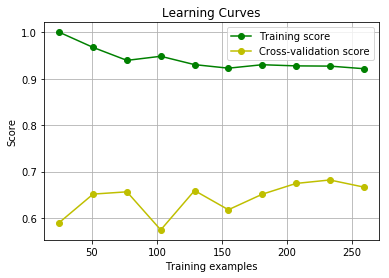

In [17]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

# import the three selcted models
from sklearn.tree import DecisionTreeClassifier

# fit The three slected models with training and testing data
model_1 = DecisionTreeClassifier()
model_1.fit(X_train,y_train)
y_train_pred_1 = model_1.predict(X_train)
y_test_pred_1 = model_1.predict(X_test)


#draw_learning_curves
draw_learning_curves(features_final,target, model_1, num_trainings=10);
print()

In [18]:
# Calculate the accuracy score for both the training  and testing set for model 1
print('Decision Tree')
train_accuracy = accuracy_score(y_train, y_train_pred_1)
test_accuracy = accuracy_score(y_test, y_test_pred_1)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print()

# Calculate the F-score for both the training subset and testing set for model 1
train_F_score = fbeta_score(y_train, y_train_pred_1, beta=0.5)
test_F_score = fbeta_score(y_test, y_test_pred_1, beta=0.5)
print('The training F-score is', train_F_score)
print('The test F-score is', train_F_score)
print()
print()

Decision Tree
The training accuracy is 0.9294871794871795
The test accuracy is 0.6025641025641025

The training F-score is 0.9471871412169918
The test F-score is 0.9471871412169918





train score:
 [[0.64       0.72       0.72      ]
 [0.76470588 0.66666667 0.66666667]
 [0.74025974 0.74025974 0.74025974]
 [0.75728155 0.76699029 0.76699029]
 [0.74418605 0.70542636 0.72868217]
 [0.72258065 0.69032258 0.69032258]
 [0.74585635 0.71270718 0.69060773]
 [0.75845411 0.7294686  0.69082126]
 [0.74248927 0.7167382  0.7167382 ]
 [0.71814672 0.6988417  0.72972973]]

train size :
 [ 25  51  77 103 129 155 181 207 233 259]

train score mean:
 [0.69333333 0.69934641 0.74025974 0.76375405 0.72609819 0.70107527
 0.71639042 0.72624799 0.72532189 0.71557272]

test_score: 
 [[0.60305344 0.58461538 0.58914729]
 [0.64122137 0.58461538 0.58914729]
 [0.70229008 0.66153846 0.59689922]
 [0.70992366 0.7        0.68217054]
 [0.70992366 0.75384615 0.68992248]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]]
test score mean:
 [0.59227204 0.60499468 0.65357592 0.6973

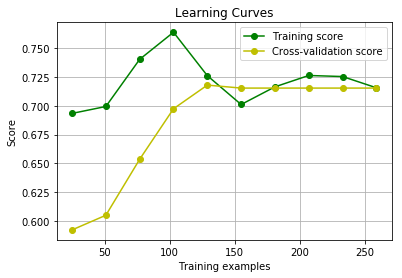

In [19]:
from sklearn.svm import SVC

model_2 = SVC()
model_2.fit(X_train,y_train)
y_train_pred_2 = model_2.predict(X_train)
y_test_pred_2 = model_1.predict(X_test)

print()
#draw_learning_curves
draw_learning_curves(features_final,target, model_2, num_trainings=10);
print()


In [20]:
# Calculate the accuracy score for both the training  and testing set for model 2
print('SVC')
train_accuracy = accuracy_score(y_train, y_train_pred_2)
test_accuracy = accuracy_score(y_test, y_test_pred_2)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print()

# Calculate the F-score for both the training subset and testing set for model 2
train_F_score = fbeta_score(y_train, y_train_pred_2, beta=0.5)
test_F_score = fbeta_score(y_test, y_test_pred_2, beta=0.5)
print('The training F-score is', train_F_score)
print('The test F-score is', train_F_score)
print()

SVC
The training accuracy is 0.7051282051282052
The test accuracy is 0.6025641025641025

The training F-score is 0.7409440175631176
The test F-score is 0.7409440175631176




train score:
 [[0.64       0.72       0.72      ]
 [0.76470588 0.66666667 0.66666667]
 [0.74025974 0.74025974 0.74025974]
 [0.75728155 0.76699029 0.76699029]
 [0.74418605 0.70542636 0.72868217]
 [0.72258065 0.69032258 0.69032258]
 [0.74585635 0.71270718 0.69060773]
 [0.75845411 0.7294686  0.69082126]
 [0.74248927 0.7167382  0.7167382 ]
 [0.71814672 0.6988417  0.72972973]]

train size :
 [ 25  51  77 103 129 155 181 207 233 259]

train score mean:
 [0.69333333 0.69934641 0.74025974 0.76375405 0.72609819 0.70107527
 0.71639042 0.72624799 0.72532189 0.71557272]

test_score: 
 [[0.60305344 0.58461538 0.58914729]
 [0.64122137 0.58461538 0.58914729]
 [0.70229008 0.66153846 0.59689922]
 [0.70992366 0.7        0.68217054]
 [0.70992366 0.75384615 0.68992248]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]
 [0.70992366 0.75384615 0.68217054]]
test score mean:
 [0.59227204 0.60499468 0.65357592 0.6973

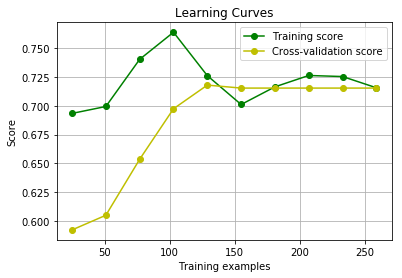

In [21]:
from sklearn.ensemble import AdaBoostClassifier

model_3 = AdaBoostClassifier()
model_3.fit(X_train,y_train)
y_train_pred_3 = model_3.predict(X_train)
y_test_pred_3 = model_3.predict(X_test)

print()
#draw_learning_curves
draw_learning_curves(features_final,target, model_2, num_trainings=10);
print()

In [22]:
# Calculate the accuracy score for both the training  and testing set for model 3
print('ensemble mehtod')
train_accuracy = accuracy_score(y_train, y_train_pred_3)
test_accuracy = accuracy_score(y_test, y_test_pred_3)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print()

# Calculate the F-score for both the training subset and testing set for model 3
train_F_score = fbeta_score(y_train, y_train_pred_3, beta=0.5)
test_F_score = fbeta_score(y_test, y_test_pred_3, beta=0.5)
print('The training F-score is', train_F_score)
print('The test F-score is', train_F_score)

ensemble mehtod
The training accuracy is 0.7852564102564102
The test accuracy is 0.717948717948718

The training F-score is 0.8103638368246968
The test F-score is 0.8103638368246968


## which is the best model ?

### The Ensemble Mehtod

the  ensemble method achieve relatively high training accuracy is 0.78 & The test accuracy is 0.71 ,
and the model not going towards over-fitting nor under-fitting.

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Describing the Model in Layman's Terms

the AdaBoost will combine simple models (weak learner) such as Decision Tree to build more complicated model(strong learner)

the first weak leaner will be set to maximize Accuracy and minimize the error after giving each point a constant weight of 1
 
 if there is some errors in our model , our second learner will focus on them to fix them  by maximizing the error at these points and as we said before the learner try to maximize the aacuracy by decreasing the error ,so if we punished the model by increasing the Weight  of error in this point and that will atract  the next learner to fix them this will be rebeated untill all points will be fixed  
 
 after this we will combine all waek leaner by adding the weight in positive area and subtract the weight for Negative area after combining all weak leaner  if the result of combining the weights for the same area is positve the outcome will be 1 and if the result of combining the weights for the same area is Negative  the outcome will be 0


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

In [23]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score
# Initialize the classifier
print("step1")
clf = AdaBoostClassifier(random_state = 1)
print("step2")
#  Create the parameters list you wish to tune, using a dictionary if needed.

parameters = {'n_estimators' : [1,2,3,4], 'learning_rate' : [0.8,1,1.5,2]}
print("step3")
# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

print("step4")
# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
print("step5")
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
print("step6")
# Get the estimator
best_clf = grid_fit.best_estimator_
print("step7")
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
print("step8")
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\noptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

best_clf

step1
step2
step3
step4
step5
step6
step7
step8
Unoptimized model
------
Accuracy score on testing data: 0.7179
F-score on testing data: 0.7906

optimized Model
------
Final accuracy score on the testing data: 0.7564
Final F-score on the testing data: 0.8333


/home/neo/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=3, random_state=1)

---
###  Final Model Evaluation

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.7179                 | 0.7564|
| F-score        | 0.7906                  |  0.8333       |


the optimized model's accuracy is 0.7564 and the optimized model's F-score is 0.8333 and for sure it is better than the unoptimized model accuracy = 0.7179 and  unoptimized model F-score= 0.7906

The accuracy and F-score improved alot if we compare it to the  naive predictor where the Naive Predictor: Accuracy score: 0.5872, F-score: 0.6400